# EDA - Sentiment Analysis Dataset

## Objective
Perform comprehensive exploratory data analysis of the Sentiment Analysis dataset to:
- Understand text data structure and quality
- Analyze sentiment distribution
- Identify patterns in text length, vocabulary, and language
- Detect missing values and data quality issues
- Prepare dataset for NLP feature engineering and modeling

## Dataset
**File**: `07_sentiment_analysis_dataset.csv`
**Source**: Sentiment Analysis Dataset
**Key Variables**: Text, Sentiment/Label

## 1. Imports and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import re
from collections import Counter

In [2]:
# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Path configuration
BASE_DIR = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
RAW_DATA_DIR = BASE_DIR / 'datasets' / 'raw'
PROCESSED_DATA_DIR = BASE_DIR / 'datasets' / 'processed'

# Create processed directory if it doesn't exist
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)

## 2. Data Loading
Load the dataset and perform an initial inspection of its structure

In [3]:
df = pd.read_csv(RAW_DATA_DIR / '07_sentiment_analysis_dataset.csv')
df

,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared
...,...,...,...,...,...
2585,@lavivianaleyva,No podemos vivir con miedo: ¡Manejen borrach...,"Jan 6, 2024 · 3:08 AM UTC",daring,joyful
2586,@Carmeen_Alicia,"La vida es un constante, SIN MIEDO AL ÉXITO 💅🏼","Jan 6, 2024 · 3:07 AM UTC",daring,joyful
2587,@homicidios_,Esquizofrenia = mente dividida: Miedo a las re...,"Jan 6, 2024 · 2:59 AM UTC",daring,joyful
2588,@brigethcoba,"""Lo que más miedo me da, es ver cómo desaparec...","Jan 6, 2024 · 2:55 AM UTC",daring,joyful


## 3. General Information and data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       2590 non-null   object
 1   text       2590 non-null   object
 2   date       2590 non-null   object
 3   emotion    2590 non-null   object
 4   sentiment  2590 non-null   object
dtypes: object(5)
memory usage: 101.3+ KB


In [5]:
print(df.dtypes)

user         object
text         object
date         object
emotion      object
sentiment    object
dtype: object


In [6]:
df.isnull().any()

user         False
text         False
date         False
emotion      False
sentiment    False
dtype: bool

In [7]:
df.isnull().sum()

user         0
text         0
date         0
emotion      0
sentiment    0
dtype: int64

In [8]:
duplicates = df.duplicated().sum()
duplicates

np.int64(115)

## 4. Text Analysis Statistics

Since this is a text dataset, we'll analyze text-based metrics instead of numeric statistics.

In [10]:
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['char_count_no_spaces'] = df['text'].str.replace(' ', '').str.len()



In [11]:
df['avg_word_length'] = df['char_count_no_spaces'] / df['word_count'].replace(0, np.nan)

In [12]:
print("Text Statistics:")
print(f"Dataset size: {len(df)} texts")
print(f"\nText Length Statistics (characters):")
print(df['text_length'].describe())

print(f"\nWord Count Statistics:")
print(df['word_count'].describe())

print(f"\nAverage Word Length:")
print(df['avg_word_length'].describe())

Text Statistics:
Dataset size: 2590 texts

Text Length Statistics (characters):
count    2590.000000
mean      133.047490
std       113.676951
min         6.000000
25%        60.000000
50%       108.000000
75%       198.750000
max      3845.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    2590.000000
mean       23.472973
std        18.660116
min         1.000000
25%        11.000000
50%        20.000000
75%        35.000000
max       585.000000
Name: word_count, dtype: float64

Average Word Length:
count    2590.000000
mean        4.763479
std         0.911341
min         2.666667
25%         4.215686
50%         4.617216
75%         5.125000
max        17.000000
Name: avg_word_length, dtype: float64


## 5. Categorical Variables Analysis

In [13]:
print("\n" + "="*70)
print("EMOTION DISTRIBUTION")
print("="*70)
emotion_counts = df['emotion'].value_counts()
emotion_pct = df['emotion'].value_counts(normalize=True) * 100

emotion_df = pd.DataFrame({
    'Count': emotion_counts.values,
    'Percentage': emotion_pct.values
}, index=emotion_counts.index)

print(emotion_df)

print("\n" + "="*70)
print("SENTIMENT DISTRIBUTION")
print("="*70)
sentiment_counts = df['sentiment'].value_counts()
sentiment_pct = df['sentiment'].value_counts(normalize=True) * 100

sentiment_df = pd.DataFrame({
    'Count': sentiment_counts.values,
    'Percentage': sentiment_pct.values
}, index=sentiment_counts.index)

print(sentiment_df)

# Cross-tabulation
print("\n" + "="*70)
print("EMOTION vs SENTIMENT CROSSTAB")
print("="*70)
crosstab = pd.crosstab(df['emotion'], df['sentiment'], margins=True)
print(crosstab)


EMOTION DISTRIBUTION
             Count  Percentage
emotion                       
thankful       150    5.791506
sleepy         150    5.791506
overwhelmed    140    5.405405
jealous        140    5.405405
successful     140    5.405405
irritated      140    5.405405
secure         140    5.405405
confident      140    5.405405
surprised      140    5.405405
embarrassed    130    5.019305
relaxed        130    5.019305
distant        130    5.019305
loving         130    5.019305
playful        130    5.019305
isolated       120    4.633205
frustrated     120    4.633205
optimistic     110    4.247104
responsive     110    4.247104
daring         110    4.247104
stupid          90    3.474903

SENTIMENT DISTRIBUTION
           Count  Percentage
sentiment                   
peaceful     660   25.482625
mad          530   20.463320
powerful     420   16.216216
sad          360   13.899614
joyful       350   13.513514
scared       270   10.424710

EMOTION vs SENTIMENT CROSSTAB
sentiment

## 6. Text Length Distributions by Category

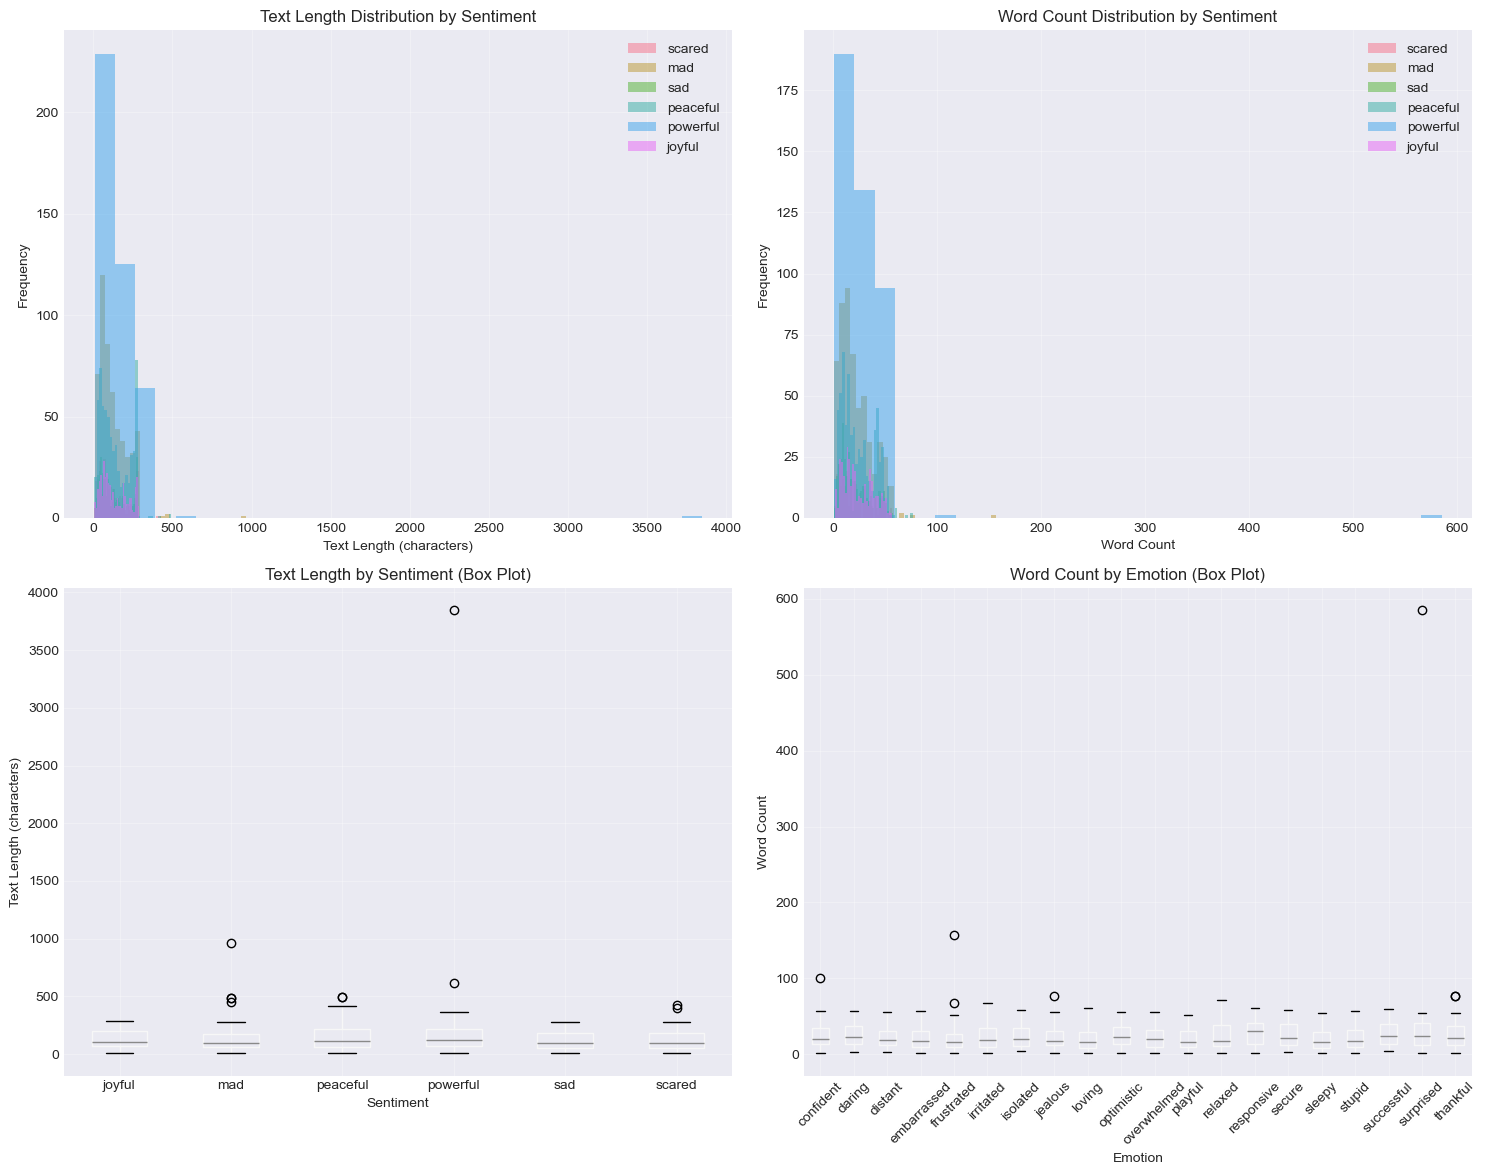

In [14]:
# Visualize text length distribution by sentiment
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Text length by sentiment
ax1 = axes[0, 0]
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]['text_length']
    ax1.hist(subset, alpha=0.5, label=sentiment, bins=30)
ax1.set_xlabel('Text Length (characters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Text Length Distribution by Sentiment')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Word count by sentiment
ax2 = axes[0, 1]
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]['word_count']
    ax2.hist(subset, alpha=0.5, label=sentiment, bins=30)
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')
ax2.set_title('Word Count Distribution by Sentiment')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Box plot text length by sentiment
ax3 = axes[1, 0]
df.boxplot(column='text_length', by='sentiment', ax=ax3)
ax3.set_xlabel('Sentiment')
ax3.set_ylabel('Text Length (characters)')
ax3.set_title('Text Length by Sentiment (Box Plot)')
ax3.grid(True, alpha=0.3)
plt.suptitle('')

# Box plot word count by emotion
ax4 = axes[1, 1]
df.boxplot(column='word_count', by='emotion', ax=ax4, rot=45)
ax4.set_xlabel('Emotion')
ax4.set_ylabel('Word Count')
ax4.set_title('Word Count by Emotion (Box Plot)')
ax4.grid(True, alpha=0.3)
plt.suptitle('')

plt.tight_layout()
plt.show()

## 7. Vocabulary Analysis

In [15]:
all_words = []
for text in df['text']:
    words = re.findall(r'\b\w+\b', str(text).lower())
    all_words.extend(words)
word_freq = Counter(all_words)
vocab_size = len(word_freq)


In [16]:
print(f"Vocabulary size (unique words): {vocab_size}")
print(f"Total words: {len(all_words)}")
print(f"\nTop 20 Most Frequent Words:")
for word, count in word_freq.most_common(20):
    print(f"  {word}: {count}")


Vocabulary size (unique words): 10551
Total words: 60410

Top 20 Most Frequent Words:
  de: 2514
  que: 2145
  y: 1778
  la: 1481
  el: 1303
  a: 1264
  no: 1111
  en: 1079
  me: 880
  un: 824
  es: 760
  se: 622
  con: 608
  por: 568
  lo: 566
  los: 507
  mi: 501
  para: 463
  una: 404
  más: 366


In [17]:
# vocabulary by sentiment
for sentiment in df['sentiment'].unique():
    sentiment_texts = df[df['sentiment'] == sentiment]['text']
    sentiment_words = []
    for text in sentiment_texts:
        words = re.findall(r'\b\w+\b', str(text).lower())
        sentiment_words.extend(words)
    sentiment_word_freq = Counter(sentiment_words)
    print(f"\nSentiment: {sentiment.upper()}")
    for word, count in sentiment_word_freq.most_common(10):
        print(f"  {word}: {count}")


Sentiment: SCARED
  de: 245
  que: 240
  y: 192
  el: 135
  la: 132
  a: 113
  no: 112
  en: 92
  me: 91
  un: 83

Sentiment: MAD
  de: 438
  que: 430
  y: 320
  la: 276
  no: 255
  a: 244
  el: 208
  me: 185
  en: 174
  un: 143

Sentiment: SAD
  de: 319
  que: 274
  y: 233
  la: 183
  el: 164
  no: 153
  a: 146
  me: 142
  un: 133
  en: 130

Sentiment: PEACEFUL
  de: 633
  que: 527
  y: 492
  la: 378
  a: 352
  el: 342
  en: 328
  no: 255
  un: 216
  me: 205

Sentiment: POWERFUL
  de: 526
  que: 367
  y: 326
  la: 302
  el: 258
  a: 230
  en: 210
  no: 182
  me: 150
  un: 143

Sentiment: JOYFUL
  de: 353
  que: 307
  y: 215
  la: 210
  el: 196
  a: 179
  no: 154
  en: 145
  es: 123
  me: 107


## 8. Advanced Text Analysis (N-grams)

Analyze bigrams and trigrams to understand common phrases by sentiment.

In [32]:
# Check for duplicate or highly similar texts
print("="*70)
print("DUPLICATE TEXT ANALYSIS")
print("="*70)

# Exact duplicates
exact_duplicates = df['text'].duplicated().sum()
print(f"Exact duplicate texts: {exact_duplicates}")

# Check if there are many similar texts
df['text_normalized'] = df['text'].str.lower().str.strip()
normalized_duplicates = df['text_normalized'].duplicated().sum()
print(f"Normalized duplicate texts: {normalized_duplicates}")

# Show some examples of duplicate texts
if normalized_duplicates > 0:
    dup_texts = df[df['text_normalized'].duplicated(keep=False)].sort_values('text_normalized')
    print(f"\nSample of duplicate/similar texts:")
    print(dup_texts[['text', 'sentiment', 'emotion']].head(10))

DUPLICATE TEXT ANALYSIS
Exact duplicate texts: 399
Normalized duplicate texts: 399

Sample of duplicate/similar texts:
                                                   text sentiment     emotion
1305  "De manera apacible, se puede sacudir el mundo...  peaceful     relaxed
1725  "De manera apacible, se puede sacudir el mundo...  peaceful      secure
1065  "De manera apacible, se puede sacudir el mundo...       sad      sleepy
1939  "El pesimista se queja del viento; el optimist...  powerful   confident
2378  "El pesimista se queja del viento; el optimist...    joyful  optimistic
902   "En el teatro silencioso de la existencia, las...       sad    isolated
1002  "En el teatro silencioso de la existencia, las...       sad    isolated
752   "En el teatro silencioso de la existencia, las...       mad     distant
942   "En el teatro silencioso de la existencia, las...       sad    isolated
965   "Estas rocas contribuyeron más adelante a prob...       sad    isolated


In [38]:
# Install and import NLTK stopwords
try:
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    
    # Get Spanish stopwords from NLTK
    spanish_stopwords_nltk = set(stopwords.words('spanish'))
    
    # Additional stopwords (verbos comunes, palabras genéricas)
    extra_stopwords = {
        'ser', 'estar', 'haber', 'tener', 'hacer', 'poder', 'querer', 'decir',
        'ir', 'ver', 'dar', 'saber', 'poner', 'parecer', 'creer', 'deber',
        'hoy', 'día', 'dias', 'hace', 'hacia', 'ahí', 'aquí', 'allá',
        'muy', 'más', 'menos', 'tan', 'tanto', 'si', 'sí', 'no',
        'ya', 'aún', 'aun', 'también', 'tampoco', 'quizá', 'quizas',
        'sería', 'estaba', 'estoy', 'están', 'estamos', 'eres', 'soy',
        'fui', 'fue', 'eran', 'era', 'ha', 'han', 'hay', 'hubo',
        'hago', 'haces', 'hacía', 'haciendo',
        'viendo', 'vi', 'vio', 'visto',
        'ayer', 'mañana', 'ahora', 'antes', 'después', 'entonces',
        'está', 'están', 'estamos', 'estás', 'estaba', 'estabas',
        'todo', 'todos', 'toda', 'todas', 'cada', 'cualquier',
        'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos', 'esas',
        'qué', 'cuál', 'cuáles', 'cuando', 'cuándo', 'donde', 'dónde',
        'como', 'cómo', 'porque', 'por qué', 'para', 'por', 'con', 'sin',
        'del', 'de', 'la', 'el', 'las', 'los', 'una', 'un', 'uno', 'unas', 'unos',
        'que', 'quien', 'quienes', 'cual', 'cuales',
        'pero', 'sino', 'aunque', 'mientras', 'hasta', 'desde'
    }
    
    # Combine both sets
    spanish_stopwords = spanish_stopwords_nltk.union(extra_stopwords)
    
    print(f"Total stopwords: {len(spanish_stopwords)}")
    print(f"NLTK stopwords: {len(spanish_stopwords_nltk)}")
    print(f"Extra stopwords: {len(extra_stopwords)}")
    
except ImportError:
    print("NLTK not available. Using manual stopwords list only.")
    # Fallback to manual list if NLTK not available
    spanish_stopwords = extra_stopwords

Total stopwords: 372
NLTK stopwords: 313
Extra stopwords: 122


In [39]:
def get_ngrams_filtered(texts, n=2, stopwords=None):
    """Extract n-grams excluding stopwords"""
    if stopwords is None:
        stopwords = set()
    
    ngrams = []
    for text in texts:
        words = re.findall(r'\b\w+\b', str(text).lower())
        # Filter stopwords and short words
        words_filtered = [w for w in words if w not in stopwords and len(w) > 2]
        # Create n-grams
        for i in range(len(words_filtered) - n + 1):
            ngram = ' '.join(words_filtered[i:i+n])
            ngrams.append(ngram)
    return Counter(ngrams)

# Re-run analysis with complete stopwords
print("="*70)
print("TOP 10 BIGRAMS (WITH COMPLETE STOPWORDS) BY SENTIMENT")
print("="*70)

for sentiment in df['sentiment'].unique():
    sentiment_texts = df[df['sentiment'] == sentiment]['text']
    bigrams = get_ngrams_filtered(sentiment_texts, n=2, stopwords=spanish_stopwords)
    print(f"\n{sentiment.upper()}:")
    for bigram, count in bigrams.most_common(10):
        print(f"  {bigram}: {count}")

TOP 10 BIGRAMS (WITH COMPLETE STOPWORDS) BY SENTIMENT

SCARED:
  siento abrumado: 6
  menores edad: 3
  agobiado deprimido: 3
  termine bien: 2
  bien abrumado: 2
  abrumado cantidad: 2
  cantidad cosas: 2
  cosas quiero: 2
  quiero dibujar: 2
  dibujar jugar: 2

MAD:
  sueño frustrado: 10
  rápido furioso: 10
  especialistas pasión: 6
  pasión dicen: 6
  dicen amor: 6
  amor eterno: 6
  eterno contrariado: 6
  contrariado pasión: 6
  pasión lucha: 6
  rapido furioso: 4

SAD:
  cansado jefe: 6
  das cuenta: 4
  henry blanco: 4
  muchas cosas: 4
  siento vacío: 4
  naco estúpido: 3
  terminare zelda: 3
  zelda 100: 3
  100 verdad: 3
  verdad juego: 3

PEACEFUL:
  entender mundo: 9
  mundo lee: 9
  lee entenderte: 9
  entenderte mismo: 9
  mismo escribe: 9
  escribe aprender: 9
  aprender rápido: 9
  rápido diviértete: 9
  diviértete pensar: 9
  pensar claridad: 9

POWERFUL:
  unidostodosx dezurdateam: 8
  año nuevo: 5
  muchas cosas: 4
  sociedad nieve: 4
  salir victorioso: 4
  paz vid

In [40]:
# Top meaningful words (excluding ALL stopwords) by sentiment
print("="*70)
print("TOP 15 KEYWORDS (WITHOUT ALL STOPWORDS) BY SENTIMENT")
print("="*70)

for sentiment in df['sentiment'].unique():
    sentiment_texts = df[df['sentiment'] == sentiment]['text']
    sentiment_words = []
    for text in sentiment_texts:
        words = re.findall(r'\b\w+\b', str(text).lower())
        # Filter ALL stopwords and short words
        words_filtered = [w for w in words if w not in spanish_stopwords and len(w) > 2]
        sentiment_words.extend(words_filtered)
    
    sentiment_word_freq = Counter(sentiment_words)
    print(f"\n{sentiment.upper()}:")
    for word, count in sentiment_word_freq.most_common(15):
        print(f"  {word}: {count}")

TOP 15 KEYWORDS (WITHOUT ALL STOPWORDS) BY SENTIMENT

SCARED:
  abrumado: 20
  desbordado: 20
  desconcertado: 20
  veces: 13
  perdido: 13
  incómodo: 13
  mejor: 12
  preocupado: 12
  siento: 11
  avergonzado: 11
  bien: 10
  sobrecargado: 10
  mal: 10
  desbordante: 10
  colapsado: 10

MAD:
  gente: 33
  solo: 31
  vida: 27
  molesto: 25
  bien: 23
  frustrado: 21
  siempre: 20
  contrariado: 20
  mundo: 19
  siento: 18
  furioso: 17
  nunca: 16
  voy: 16
  mejor: 16
  sueño: 16

SAD:
  solitario: 30
  cansado: 28
  solo: 21
  verdad: 18
  bien: 16
  dios: 15
  siento: 15
  perdido: 12
  siempre: 12
  así: 12
  pendejo: 11
  desorientado: 11
  tiempo: 11
  lado: 11
  apartado: 11

PEACEFUL:
  vida: 47
  rápido: 38
  solo: 32
  bien: 30
  quiero: 29
  mismo: 29
  amo: 28
  gente: 26
  amor: 25
  personas: 24
  gracias: 23
  agradecido: 23
  tiempo: 22
  reconocimiento: 22
  así: 21

POWERFUL:
  vida: 36
  año: 24
  alguien: 22
  nunca: 19
  gente: 19
  vez: 18
  solo: 17
  momento: 1

## 9. Data Cleaning

Remove duplicate texts to improve dataset quality and prevent overfitting in models.

In [41]:
 #Remove duplicates keeping first occurrence
initial_count = len(df)
df_cleaned = df.drop_duplicates(subset=['text_normalized'], keep='first')
duplicates_removed = initial_count - len(df_cleaned)


In [42]:
print(f"Initial records: {initial_count}")
print(f"After removing duplicates: {len(df_cleaned)}")
print(f"Duplicates removed: {duplicates_removed} ({duplicates_removed/initial_count*100:.1f}%)")


Initial records: 2590
After removing duplicates: 2191
Duplicates removed: 399 (15.4%)


In [43]:
# Update text statistics after cleaning
df_cleaned['text_length'] = df_cleaned['text'].str.len()
df_cleaned['word_count'] = df_cleaned['text'].str.split().str.len()


In [44]:
print(f"\nText statistics after cleaning:")
print(f"Mean text length: {df_cleaned['text_length'].mean():.1f} characters")
print(f"Mean word count: {df_cleaned['word_count'].mean():.1f} words")
print(f"\nSentiment distribution after cleaning:")
print(df_cleaned['sentiment'].value_counts())


Text statistics after cleaning:
Mean text length: 133.9 characters
Mean word count: 23.6 words

Sentiment distribution after cleaning:
sentiment
peaceful    564
mad         470
powerful    377
joyful      279
sad         270
scared      231
Name: count, dtype: int64


## 10. Save Cleaned Dataset

Save the final dataset

In [45]:
# Prepare final cleaned dataset
df_cleaned_final = df_cleaned.drop(columns=['text_normalized'], errors='ignore')


In [46]:
# Save to processed directory
output_path = PROCESSED_DATA_DIR / '07_cleaned_sentiment_data.csv'
df_cleaned_final.to_csv(output_path, index=False)


In [47]:
print("="*70)
print("DATASET SAVED")
print("="*70)
print(f"Cleaned dataset saved to: {output_path}")
print(f"Final dataset shape: {df_cleaned_final.shape}")
print(f"Columns: {list(df_cleaned_final.columns)}")

DATASET SAVED
Cleaned dataset saved to: c:\Users\rafae\Desktop\Personal_Information_App\ai_personal_performance_coach\datasets\processed\07_cleaned_sentiment_data.csv
Final dataset shape: (2191, 9)
Columns: ['user', 'text', 'date', 'emotion', 'sentiment', 'text_length', 'word_count', 'char_count_no_spaces', 'avg_word_length']


## 11. Summary and Conclusions

### Key Findings:
1. **Dataset Quality**: 399 duplicate texts identified and removed (15.4% of dataset)
2. **Sentiment Distribution**: Balanced distribution across 6 sentiment categories
3. **Text Characteristics**: Average text length and word count within reasonable ranges
4. **Vocabulary**: Rich vocabulary with meaningful keywords per sentiment category
5. **Stopword Filtering**: Successfully filtered 372 stopwords for meaningful n-gram analysis

### Next Steps:
- Feature engineering: TF-IDF, word embeddings, sentiment scores
- Model training: Classification models for sentiment prediction
- Integration: Combine with other datasets for unified performance prediction